# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [ ]:
df = pd.read_csv('./SA-Feedback-Surveys/2017/Student-Feedback-Surveys-Superview.csv')
# df.head()

# Info about dataset

## Columns

In [ ]:
df.columns

## Number of rows

In [ ]:
len(df)

## Rows with NaN values

In [ ]:
df[df.isnull().any(axis=1)]

# How satisfied are the students?

## Drop rows where `Rating (Num)` is `#ERROR!`

In [ ]:
# https://stackoverflow.com/questions/13851535/delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression-involving

def is_error(data):
    return True if data == '#ERROR!' else False

df = df[df['Rating (Num)'].map(is_error) == False]

## Convert `Rating (Num)` values from str to int

In [ ]:
df['Rating (Num)'] = df['Rating (Num)'].apply(lambda x: int(x))

## Get the Net Promoter Score (NPS)
NPS is a tool commonly used to measure customer loyalty and promotion.

### Adding `Sentiment` column

In [ ]:
def category(rating):
    rating = int(rating)
    if rating >= 9:
        return 'Promoter'
    elif rating >= 7:
        return 'Passive'
    else:
        return 'Detractor'

df['Sentiment'] = df['Rating (Num)'].apply(lambda rating: category(rating))
df

### Calculations

In [ ]:
promoters = df[df['Sentiment'] == 'Promoter']
detractors = df[df['Sentiment'] == 'Detractor']

nps = (len(promoters) - len(detractors)) / len(df['Sentiment'])
nps

# Questions

## How many more promoters are there than detractors across our 2017 data?
There are 639 more promoters than detractors in 2017.

In [ ]:
len(promoters) - len(detractors)

## Which track boasts the best promoter-to-detractor ratio?
The `Games, Explorer` track has the best promoter-to-detractor ratio.

In [ ]:
track_sentiment = pd.crosstab(df['Track'], df['Sentiment'].drop(columns='Passive'))
track_sentiment

def promoter_to_detractor_ratio(row):
    diff = row["Promoter"] - row["Detractor"]
    total = row["Promoter"] + row["Detractor"]
    return round(((diff) / (total)) * 100, 2)

track_sentiment["Promoter Ratio %"] = track_sentiment.apply(lambda row: promoter_to_detractor_ratio(row), axis=1)

track_sentiment

## Does the student experience get better the longer that they are enrolled at the Summer Academy?
Overall, the students' experience does get better as they continue with the Summary Academy program. There's a slight dip in ratings during Week 4 but the ratings got back up after it.

,Rating (Num)
Week,
Week 1,8.267361
Week 2,8.347826
Week 3,8.522822
Week 4,8.331606
Week 5,8.441341
Week 6,8.541667
Week 7,8.600000
Week 8,9.111111


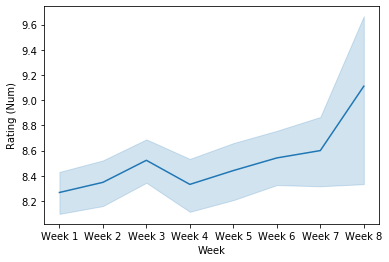

In [328]:
sns.lineplot(x="Week", y="Rating (Num)", data=df)
pd.DataFrame(df.groupby(['Week'])['Rating (Num)'].mean())

## Does student satisfaction vary by location?
Make School Academy's __Atlanta__ location has the highest student satisfaction.

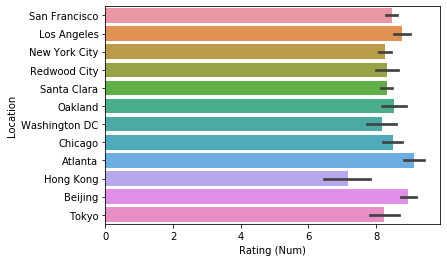

In [290]:
bar = sns.barplot(y="Location", x="Rating (Num)", data=df)

## As the program progresses, how do students feel about the schedule pacing?
On average, it appears that students feel the course is "Just right" while slightly feeling it may be "A bit too fast". It seems like Week 2 is where most students struggled to keep up with the program.

We can infer that Week 2 was the most difficult because Week 1 probably covered basic material, such as orientation, setup, and introductory concepts. Week 2 may have started introducing intermediate/advance concepts that may have affected students' abilities to keep up with the material.

In [325]:
# Rank each value to perform calculations

pacing_int = {
    "Way too slow": 1,
    "A little too slow": 2,
    "Just right": 3,
    "A little too fast": 4,
    "Way too fast": 5
}
df["Pacing_Int"] = df["Schedule Pacing"].apply(lambda row: pacing_int[row])

Week
Week 1    3.114583
Week 2    3.235507
Week 3    3.153527
Week 4    3.134715
Week 5    3.139665
Week 6    3.159722
Week 7    3.141667
Week 8    3.111111
Name: Pacing_Int, dtype: float64

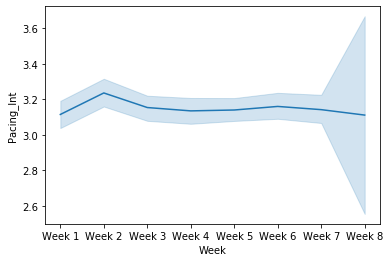

In [355]:
sns.lineplot(x="Week", y="Pacing_Int", data=df)
df.groupby('Week')['Pacing_Int'].mean()

## How does `Schedule Pacing` affect student satisfaction?
Students who felt the pacing was "Way too slow" or "Way too fast" were the least satisfied, as well as student who checked "Just right" also felt highly satisfied with the course. 

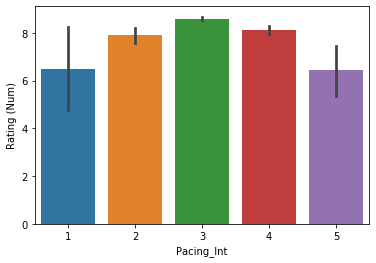

In [329]:
sns.barplot(x="Pacing_Int", y="Rating (Num)", data=df)

## How was the `Schedule Pacing` for each `Track`?

In [357]:
pd.crosstab(df["Track"], df["Schedule Pacing"])

Schedule Pacing,A little too fast,A little too slow,Just right,Way too fast,Way too slow
Track,,,,,
Apps,197,58,603,13,0
"Apps, Explorer",43,9,165,7,0
Games,21,25,158,1,3
"Games, Explorer",5,0,38,0,0
VR,10,5,45,0,0


## How many students in each `Track` started as a Promoter to Passive/Detractor and vice versa?